# Finding the closest pair of points

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

plt.style.use("ggplot")

%matplotlib inline

## Merge Sort

In [2]:
X = np.random.rand(64,2)

In [3]:
def sort_2(array):
    if array[0][0] > array[1][0]:
        return np.array([array[1], array[0]])
    else:
        return array

In [4]:
X[:2]

array([[0.81505639, 0.56039462],
       [0.45916977, 0.08641075]])

In [5]:
sort_2(X[:2])

array([[0.45916977, 0.08641075],
       [0.81505639, 0.56039462]])

In [48]:
def sort_nest(array, coordinate=0):
    
    length = len(array)
    
    if length == 2:
        if array[0][coordinate] > array[1][coordinate]:
            return np.array([array[1], array[0]])
        else:
            return array
    
    elif length > 2:
        array_l = array[:int(length/2)]
        array_r = array[int(length/2):]
        array_l_sorted = sort_nest(array_l, coordinate)
        array_r_sorted = sort_nest(array_r, coordinate)

        l = 0
        r = 0
        
        sorted_list = []
        
        for i in range(length):
            if r == int(length/2):
                sorted_list.append(array_l_sorted[l])
                l += 1

            elif l == int(length/2):
                sorted_list.append(array_r_sorted[r])
                r += 1             
                
            elif array_l_sorted[l][coordinate] > array_r_sorted[r][coordinate]:
                sorted_list.append(array_r_sorted[r])
                r += 1
                
            elif array_l_sorted[l][coordinate] < array_r_sorted[r][coordinate]:
                sorted_list.append(array_l_sorted[l])
                l += 1
        
        return np.array(sorted_list)

In [49]:
X = np.random.rand(64,2)

In [50]:
sort_nest(X)

array([[0.01259837, 0.37307678],
       [0.03114066, 0.57741892],
       [0.04211828, 0.83023237],
       [0.04770493, 0.64528213],
       [0.07090634, 0.9298389 ],
       [0.08420732, 0.60842602],
       [0.11048201, 0.54201127],
       [0.16662539, 0.8884755 ],
       [0.16794428, 0.81335895],
       [0.1690136 , 0.88332097],
       [0.18054723, 0.86539323],
       [0.18572705, 0.51617648],
       [0.18849591, 0.04437632],
       [0.23243048, 0.71985853],
       [0.24068014, 0.11212876],
       [0.28005983, 0.89203056],
       [0.28429535, 0.65684714],
       [0.29405325, 0.56910223],
       [0.32019116, 0.19690722],
       [0.32925724, 0.35667555],
       [0.33419656, 0.40936125],
       [0.35033586, 0.16472161],
       [0.38737837, 0.03804974],
       [0.39426408, 0.49477581],
       [0.39976423, 0.15110378],
       [0.41052542, 0.47714343],
       [0.46788641, 0.13268372],
       [0.46795233, 0.60045746],
       [0.47067047, 0.92093693],
       [0.48598977, 0.23441625],
       [0.

In [51]:
sort_nest(X, 1)

array([[0.4978691 , 0.0249602 ],
       [0.80730482, 0.02564738],
       [0.38737837, 0.03804974],
       [0.18849591, 0.04437632],
       [0.82985517, 0.0525047 ],
       [0.83283202, 0.09745489],
       [0.24068014, 0.11212876],
       [0.46788641, 0.13268372],
       [0.74661676, 0.13404118],
       [0.39976423, 0.15110378],
       [0.35033586, 0.16472161],
       [0.64372046, 0.18197792],
       [0.84043178, 0.18664162],
       [0.32019116, 0.19690722],
       [0.54959918, 0.21071295],
       [0.48598977, 0.23441625],
       [0.62307023, 0.28807328],
       [0.71558146, 0.2922452 ],
       [0.82837101, 0.34317816],
       [0.95518052, 0.35110592],
       [0.32925724, 0.35667555],
       [0.01259837, 0.37307678],
       [0.91736628, 0.38165279],
       [0.33419656, 0.40936125],
       [0.86028554, 0.4497449 ],
       [0.41052542, 0.47714343],
       [0.39426408, 0.49477581],
       [0.84969182, 0.50713933],
       [0.18572705, 0.51617648],
       [0.11048201, 0.54201127],
       [0.

## Finding the Closest Pair of Points

In [9]:
X = np.random.rand(64,2)

In [10]:
def find_closest_4(array):
    sorted_array = sort_nest(array)
    length = len(sorted_array)
    array_l = sorted_array[:int(length/2)]
    array_r = sorted_array[int(length/2):]
    
    dict_l = {}
    dict_l["p1"] = array_l[0]
    dict_l["p2"] = array_l[1]
    dict_l["distance"] = np.sqrt((array_l[0][0]-array_l[1][0])**2+(array_l[0][1]-array_l[1][1])**2)
    dict_r = {}
    dict_r["p1"] = array_r[0]
    dict_r["p2"] = array_r[1]
    dict_r["distance"] = np.sqrt((array_r[0][0]-array_r[1][0])**2+(array_r[0][1]-array_r[1][1])**2)
    
    if dict_l["distance"] > dict_r["distance"]:
        dict_both = dict_r
    else:
        dict_both = dict_l
    
    distance_cross = np.sqrt((sorted_array[1][0]-sorted_array[2][0])**2+(sorted_array[1][1]-sorted_array[2][1])**2)
    if distance_cross > dict_both["distance"]:
        dict_final = dict_both
    else:
        dict_final = {}
        dict_final["p1"] = sorted_array[1]
        dict_final["p2"] = sorted_array[2]
        dict_final["distance"] = distance_cross
    
    return(dict_final)

In [58]:
X[:4]

array([[0.94029668, 0.82993257],
       [0.65783051, 0.94605382],
       [0.23243048, 0.71985853],
       [0.03114066, 0.57741892]])

In [59]:
find_closest_4(X[:4])

{'p1': array([0.03114066, 0.57741892]),
 'p2': array([0.23243048, 0.71985853]),
 'distance': 0.24659000978659854}

In [91]:
def find_closest_nest(array):
    X = sort_nest(array, 0)
    length = len(X)
    if length < 4:
        return find_closest_brute_force(array)
    
    else:
        array_l = X[:int(length/2)]
        array_r = X[int(length/2):]

        dict_l = find_closest_nest(array_l)
        dict_r = find_closest_nest(array_r)
                    
        if dict_l["distance"] > dict_r["distance"]:
            dict_both = dict_r
        else:
            dict_both = dict_l
        
        Y = sort_nest(array, 1)
        
        Y_list = []
        for i in range(length):
            if X[int(length/2-1)][0]-dict_both["distance"] < Y[i][0] < X[int(length/2-1)][0]+dict_both["distance"]:
                Y_list.append(Y[i])

        Y = np.array(Y_list)
        if len(Y) == 1:
            dict_final = dict_both
        elif len(Y) < 8:
            dict_y = find_closest_brute_force(Y)
            if dict_both["distance"] > dict_y["distance"]:
                dict_final = dict_y
            else:
                dict_final = dict_both            
        else:
            for i in range(len(Y)-7):
                dict_y = find_closest_brute_force(Y[i:i+7])        
                
                if dict_both["distance"] > dict_y["distance"]:
                    dict_final = dict_y
                else:
                    dict_final = dict_both
    
        return dict_final

In [92]:
find_closest_nest(X)

{'p1': array([0.1690136 , 0.88332097]),
 'p2': array([0.16662539, 0.8884755 ]),
 'distance': 0.005680904480431322}

### Brute Force Function

In [15]:
def find_closest_brute_force(array):
    
    dict_final = {}
    dict_final["p1"] = array[0]
    dict_final["p2"] = array[1]
    dict_final["distance"] = np.sqrt((array[0][0]-array[1][0])**2+(array[0][1]-array[1][1])**2)
    
    for i in range(len(array)-1):
        for j in range(i+1, len(array)):
            distance = np.sqrt((array[i][0]-array[j][0])**2+(array[i][1]-array[j][1])**2)
            if distance < dict_final["distance"]:
                dict_final["p1"] = array[i]
                dict_final["p2"] = array[j]
                dict_final["distance"] = distance

    return dict_final

In [64]:
find_closest_brute_force(X)

{'p1': array([0.1690136 , 0.88332097]),
 'p2': array([0.16662539, 0.8884755 ]),
 'distance': 0.005680904480431322}

### Performance Check

In [93]:
Z = np.random.rand(2**10,2)
Z.shape

(1024, 2)

In [94]:
start_time = time.time()
find_closest_brute_force(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.3881092071533203 seconds ---


In [95]:
start_time = time.time()
find_closest_nest(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5066041946411133 seconds ---


In [96]:
Z = np.random.rand(2**12,2)
Z.shape

(4096, 2)

In [97]:
start_time = time.time()
find_closest_brute_force(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 53.920708894729614 seconds ---


In [98]:
start_time = time.time()
find_closest_nest(Z)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.2317519187927246 seconds ---


In [99]:
time_list = []
for i in range(2, 15):
    Z = np.random.rand(2**i, 2)
    
    start_time = time.time()
    find_closest_brute_force(Z)
    brute = time.time() - start_time

    start_time = time.time()
    find_closest_nest(Z)
    nest = time.time() - start_time
    
    time_list.append([brute, nest])
    print("i={}: completed".format(i))

i=2: completed
i=3: completed
i=4: completed
i=5: completed
i=6: completed
i=7: completed
i=8: completed
i=9: completed
i=10: completed
i=11: completed
i=12: completed
i=13: completed
i=14: completed


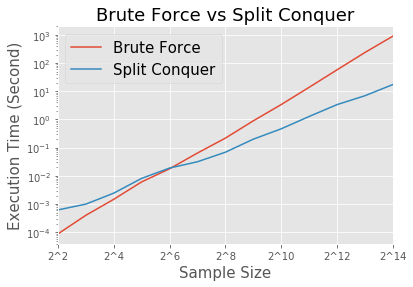

In [100]:
time_df = pd.DataFrame(time_list, index=range(2, 15), columns=["brute_force", "split_conquer"])
time_df.plot()
plt.title("Brute Force vs Split Conquer", fontsize=18)
plt.legend(["Brute Force", "Split Conquer"], fontsize=15)
plt.xlabel("Sample Size", fontsize = 15)
plt.xticks(np.arange(2, 15, 2), labels = ["2^{}".format(i) for i in range(2, 15, 2)])
plt.yscale("log")
plt.ylabel("Execution Time (Second)", fontsize = 15)
plt.savefig("image/find_closest.png")
plt.show()